In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np;
import pandas as pd

plt.plot([1,2,3],[4,5,6])
plt.show()

In [ ]:


# Simple data
x = [10, 11, 12, 13, 14, 15, 16]
y = [100, 170, 200, 270, 300, 370, 400]


plt.plot(x,y)

plt.title('graph')

plt.xlabel('x')
plt.ylabel('y')


In [ ]:
A = [10, 11, 12, 13, 14, 15, 16]
B1 = [100, 170, 200, 270, 300, 370, 400]
B2 = [90, 110, 130, 150, 170, 190, 210]

plt.plot(A,B1)
plt.plot(A,B2)

plt.title('area vs price')

plt.xlabel('area m2')

plt.ylabel('price $')

plt.legend(['B1','B2'])

In [ ]:
A = [10, 11, 12, 13, 14, 15, 16]
B1 = [100, 170, 200, 270, 300, 370, 400]
B2 = [90, 110, 130, 150, 170, 190, 210]
from matplotlib.lines import lineStyles

plt.plot(A,B1,color='red',linestyle='--',marker='*',label='B1')
plt.plot(A,B2,color='blue',linestyle='-.',marker='.',label='B2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
A = [10, 11, 12, 13, 14, 15, 16]
B1 = [100, 170, 200, 270, 300, 370, 400]
B2 = [90, 110, 130, 150, 170, 190, 210]


print(plt.style.available)

plt.style.use('bmh')

plt.plot(A,B1,color='red',linestyle='--',marker='*',label='B1')
plt.plot(A,B2,color='blue',linestyle='-.',marker='.',label='B2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('true')


In [ ]:
df = pd.read_csv('cleaned_orders_final.csv')



df['OrderDate']=pd.to_datetime(df['OrderDate'])

df['ShippedDate']=pd.to_datetime(df['ShippedDate'])

print('\n')
# print(df['OrderDate'].dtype)
# print(df['ShippedDate'].dtype)
df.head(3)


avgShipCostPerCountry=df.groupby(df['ShipCountry'])['ShippingCost'].median()

print(avgShipCostPerCountry)

# plt.plot(df['ShipCountry'],avgShipCostPerCountry)

In [ ]:
# Set the figure size for better readability

plt.figure(figsize=(10,6))

df.head()

# Group data by country and calculate the average shipping cost per country
# Then sort the results for a cleaner horizontal bar chart

df.groupby('ShipCountry')['ShippingCost'].mean().sort_values().plot(kind='barh', color='skyblue')

# Set the title of the plot
plt.title('Ship Cost per Country')

# Label the X and Y axes
plt.xlabel('Country')
plt.ylabel('Ship Cost')

# Show grid lines to improve readability
plt.grid(True)
# Automatically adjust layout to prevent label cutoff

plt.tight_layout()
# Display the final plot

# plt.show()

In [44]:
df.head()

,OrderID,CustomerID,OrderDate,ShippedDate,ShippingCost,ShipCountry,ShipCity,ShippingCompany,DeliveryDays,DeliveryStatus,IsDomestic
0,1000.0,C001,2025-05-17,2025-07-30,234.09,Germany,Hamburg,Kiwilytics Goods Shipping LLC.,74.0,Late,Yes
1,1001.0,C002,2025-01-26,2025-07-30,320.61,Canada,Montreal,UPS Worldwide,185.0,Late,No
2,1002.0,C003,2025-03-08,2025-07-30,165.17,Canada,Vancouver,FedEx Logistics,144.0,Late,No
3,1003.0,C004,2025-03-24,2025-07-30,12.55,Germany,Munich,Aramex International,128.0,Late,Yes
4,1004.0,C005,2025-04-15,2025-07-30,186.36,Canada,Vancouver,FedEx Logistics,106.0,Late,No


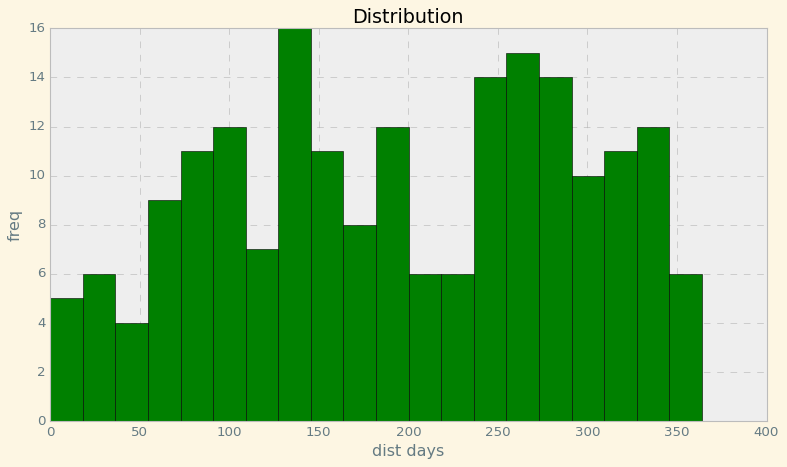

In [ ]:
# Set the size of the figure

plt.figure(figsize=(10,6))
# Plot a histogram of delivery days
# Drop any missing values to avoid errors

df['DeliveryDays'].dropna().plot(kind='hist' ,bins=20, color='green', edgecolor='black' )

# Add a title to the chart

plt.title('Distribution')
# Label the X-axis and Y-axis

plt.xlabel('dist days')
plt.ylabel('freq')
# Add gridlines for easier visual estimation

plt.grid(True)
# Adjust layout to avoid overlap or cut-off

plt.tight_layout()
# Render the plot

plt.show()




In [53]:
# print(df.loc[df['DeliveryDays']<=50])

print(df.loc[df['DeliveryDays'] <= 150, ['OrderID', 'DeliveryDays']])

     OrderID  DeliveryDays
0     1000.0          74.0
2     1002.0         144.0
3     1003.0         128.0
4     1004.0         106.0
16    1016.0          56.0
..       ...           ...
232   1235.0         134.0
233   1236.0          75.0
234   1237.0          45.0
235   1238.0         144.0
236   1239.0           8.0

[73 rows x 2 columns]


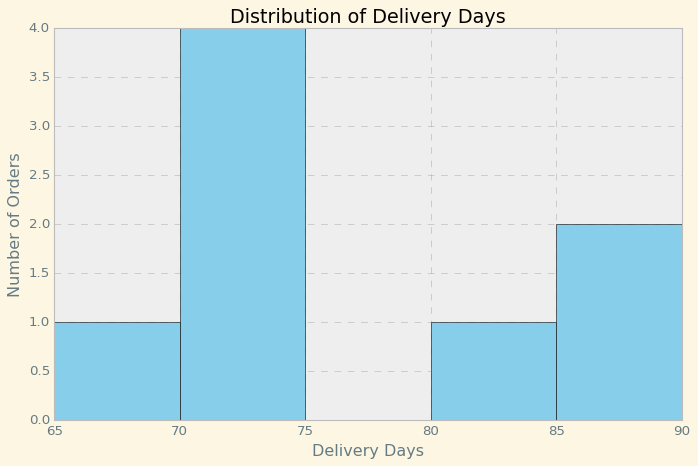

In [52]:
delivery_days = [65, 70, 74, 74, 74, 80, 85, 90]

plt.figure(figsize=(8, 5))
plt.hist(delivery_days, bins=5, color='skyblue', edgecolor='black')

plt.xlabel('Delivery Days')         # X-axis: delivery time ranges
plt.ylabel('Number of Orders')      # Y-axis: how many orders in each range
plt.title('Distribution of Delivery Days')
plt.grid(True)
plt.show()

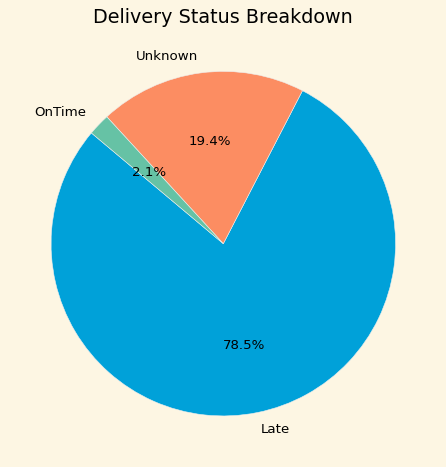

In [54]:
# Set the figure size (square shape is ideal for pie charts)
plt.figure(figsize=(6, 6))

# Create a pie chart of the delivery status counts
df["DeliveryStatus"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",  # Show percentages with 1 decimal
    startangle=140,  # Start angle to rotate the chart for balance
    colors=[
        "#00A1D9",
        "#fc8d62",
        "#66c2a5",
    ],  # Custom colors (greenish and orange tones))
)
# Set the title of the plot
plt.title("Delivery Status Breakdown")

# Hide the y-axis label (not needed for pie charts)
plt.ylabel("")

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the pie chart
plt.show()

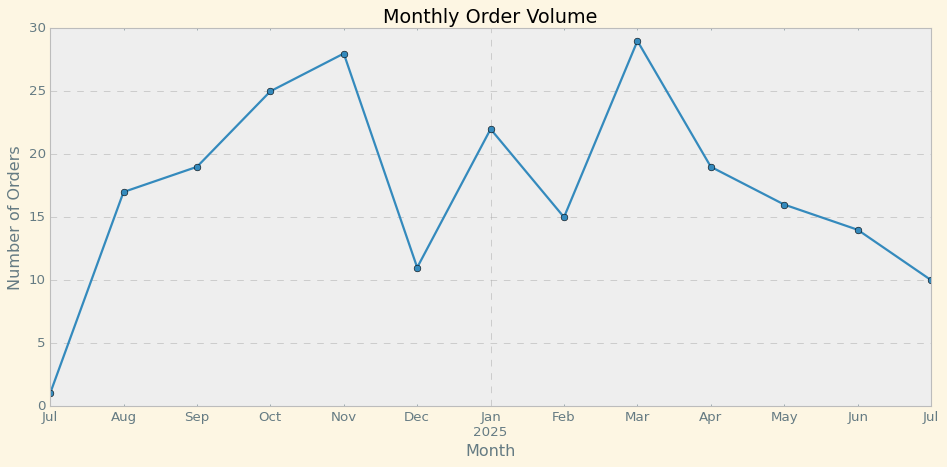

In [60]:
# Extract the month from the order date (format: YYYY-MM)
df['months']=df['OrderDate'].dt.to_period('M')

df.head()
# Group the data by month and count the number of orders per month
orders_month= df.groupby('months').size()

# #print(monthly_orders)

# # Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# # Plot the monthly order volume as a line chart
orders_month.plot(kind='line',marker='o')

# Add a title to the plot
plt.title("Monthly Order Volume")

# Label the axes
plt.xlabel("Month")
plt.ylabel("Number of Orders")
# Add gridlines for easier reading
plt.grid(True)

# Optimize layout spacing
plt.tight_layout()

# Display the chart
plt.show()
